1. ### Import Needed Libraries

In [1]:
import numpy as np
import aeromod as mod
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.interpolate import RectBivariateSpline

2. ### Part A - Solving Problem 19

In [2]:
def Ax(v):
    return np.dot(a,v)
    
a = np.array([[-4, 1, 0, 1, 0, 0, 0, 0, 0],
              [1, -4, 1, 0, 1, 0, 0, 0, 0],
              [0, 0, -4, 0, 0, 1, 0, 0, 0],
              [1, 0, 0, -4, 1, 0, 1, 0, 0],
              [0, 1, 0, 1, -4, 1, 0, 1, 0],
              [0, 0, 1, 0, 1, -4, 0, 0, 1],
              [0, 0, 0, 1, 0, 0, -4, 1, 0],
              [0, 0, 0, 0, 1, 0, 1, -4, 1],
              [0, 0, 0, 0, 0, 1, 0, 1, -4]], dtype='float64')

b = np.array([-100,0,0,-100,0,0,-300,-200,-200])
x0 = np.zeros_like(b)
t0 = time.perf_counter()
conjugate, numIterP1 = mod.conjGrad(Ax, x0, b, tol=1.0e-9)
timeFiveFive = time.perf_counter() - t0
reshapedConj = np.reshape(conjugate, (3, 3))
reshapedConj = np.flip(reshapedConj, axis=0)
reshapedConj = np.insert(reshapedConj, 3, [0, 0, 0], axis=0)
reshapedConj = np.insert(reshapedConj, 0, [100, 100, 100, 50], axis=1)
reshapedConj = np.insert(reshapedConj, 0, [150, 200, 200, 200], axis=0)
reshapedConj = np.insert(reshapedConj, 4, [100, 0, 0, 0, 0], axis=1)
conjugate = np.reshape(conjugate,(len(conjugate),1))

print("The solution is: ", conjugate)
print("The heat map is: ", reshapedConj)

The solution is:  [[ 56.04546147]
 [ 34.95515125]
 [ 10.97291142]
 [ 89.24075785]
 [ 72.81042271]
 [ 43.88200412]
 [128.10322338]
 [123.16697039]
 [ 91.76304024]]
The heat map is:  [[150.         200.         200.         200.         100.        ]
 [100.         128.10322338 123.16697039  91.76304024   0.        ]
 [100.          89.24075785  72.81042271  43.88200412   0.        ]
 [100.          56.04546147  34.95515125  10.97291142   0.        ]
 [ 50.           0.           0.           0.           0.        ]]


3. ### Part B - Visualizing Problem19 Solution

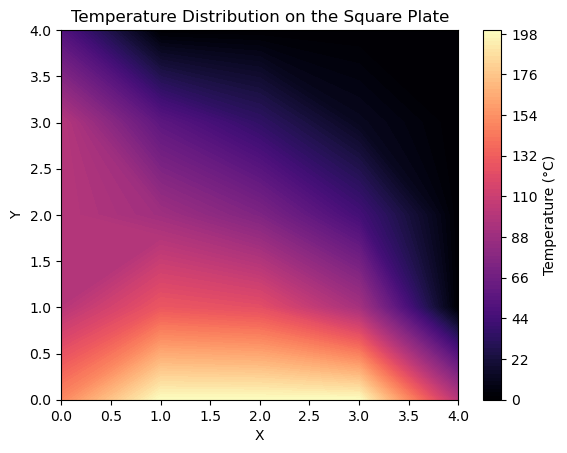

In [3]:
plt.contourf(reshapedConj, cmap='magma', levels=100)
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Distribution on the Square Plate')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

4. ### Part C Part A - Expanding in XY Space

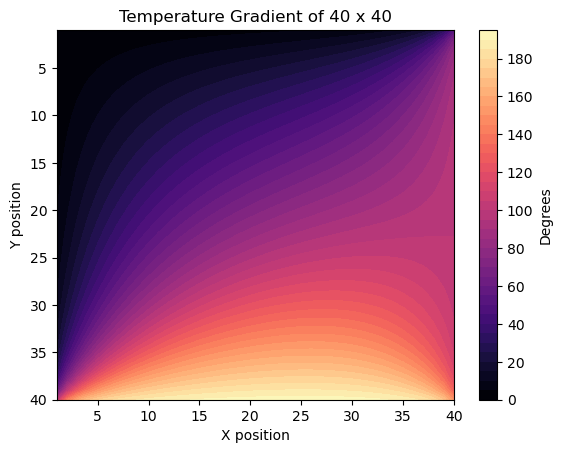

In [4]:
bExpansion = mod.Problem19b(40)
xExpansion = np.zeros(1600)

t0 = time.perf_counter()
xExpansion, numIterP2 = mod.conjGrad(mod.Problem19mesh, xExpansion, bExpansion.copy())
timeFortyForty = time.perf_counter() - t0
xExpansion = xExpansion.reshape([40, 40])
x = np.arange(1, 41)
y = x
plt.contourf(x, y, xExpansion, cmap='magma', levels = 40)
plt.gca().invert_yaxis()
plt.colorbar(label='Degrees')
plt.title('Temperature Gradient of 40 x 40')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

5. ### Part C Part B - Comparing Preformances and Order of Operations

In [5]:
x = (np.log(timeFortyForty/timeFiveFive)/np.log(40/3))
print("Order of Operations: ", x)

Order of Operations:  2.8605817227585053


In [6]:
preformance_comparison = {"Size": ["3x3", "40x40"], "Number of Iterations": [numIterP1, numIterP2], "Time":[timeFiveFive, timeFortyForty]}
preformance_comparison_table = pd.DataFrame(preformance_comparison)
preformance_comparison_table = preformance_comparison_table.style.set_table_styles([{'selector': 'th, td', 'props': [('text-align', 'center')]}])
preformance_comparison_table

,Size,Number of Iterations,Time
0,5x5,8,0.000448
1,40x40,139,0.740374
